Cleaning Dataset for future linear regression model

Importing Libraries

In [83]:
# import packages for project
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data

In [84]:
# reading dataset
survey = pd.read_csv('C:/Users/86bur/survey_results_public.csv')
schema = pd.read_csv('C:/Users/86bur/survey_results_schema.csv')

In [85]:
# checking data
survey.head(5)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [86]:
survey.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    object 
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

In [87]:
# checking schema data
pd.set_option('display.max_rows', 90)
schema

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR
5,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR
6,QID25,EdLevel,Which of the following best describes the high...,True,MC,SAVR
7,QID276,LearnCode,How do you learn to code? Select all that apply.,False,MC,MAVR
8,QID281,LearnCodeOnline,What online resources do you use to learn to c...,False,MC,MAVR
9,QID331,TechDoc,What is the source of the technical documentat...,False,MC,MAVR


Data Pre-processing 

4.1.1 I will filter the dataframe to focus on the United States. Then I will check for columns with the most nulls and idenify potenial columns to focus on in the future analysis. I will drop nulls from columns I've singled out. 

In [88]:
# filtering by US
US_devs = survey[survey['Country'] == 'United States of America']

In [89]:
US_devs.isnull().sum()

ResponseId                0
MainBranch                0
Age                       0
Employment                0
RemoteWork             1657
                       ... 
JobSatPoints_11        5513
SurveyLength            499
SurveyEase              475
ConvertedCompYearly    6418
JobSat                 5561
Length: 114, dtype: int64

In [90]:
# creating new dataframe for US
# identifying columns to work with
pot_feat = ['MainBranch', 'Age', 'Employment', 'EdLevel', 'YearsCode',
            'YearsCodePro', 'CompTotal', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith']
US = US_devs[pot_feat]

4.1.2 Droping missing data from dataset and filtering further to employed professional. 

In [91]:
# dropping missing data
US.dropna(inplace=True)

C:\Users\86bur\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [92]:
# checking numter of rows and columns
US.shape

(5980, 9)

In [93]:
# creating new dataframe of full time employed workers
worker_us = US[US['Employment'] == 'Employed, full-time']

In [94]:
# filtering out missing salaries
comp = worker_us['CompTotal'] != 0

In [95]:
# creating new dataframe with filtered salaries
us_dev_df = worker_us[comp]

In [96]:
# checking numter of rows and columns
us_dev_df.shape

(4957, 9)

In [97]:
# resetting index
us_dev_df.reset_index(drop=True, inplace=True)

In [98]:
# checking data
us_dev_df.head(5)

,MainBranch,Age,Employment,EdLevel,YearsCode,YearsCodePro,CompTotal,LanguageHaveWorkedWith,DatabaseHaveWorkedWith
0,I am a developer by profession,45-54 years old,"Employed, full-time",Some college/university study without earning ...,38,30,195000.0,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,Microsoft SQL Server;PostgreSQL;Snowflake
1,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,11,230000.0,Bash/Shell (all shells);Go;Python;Rust,BigQuery;Elasticsearch;MariaDB;MongoDB;Redis;S...
2,I am a developer by profession,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25,23,85000.0,Bash/Shell (all shells);C#;C++;Go;HTML/CSS;Jav...,Microsoft SQL Server
3,I am a developer by profession,35-44 years old,"Employed, full-time","Secondary school (e.g. American high school, G...",20,18,160000.0,C#;Go;HTML/CSS;JavaScript;SQL;TypeScript,MariaDB;Microsoft SQL Server;PostgreSQL
4,I am a developer by profession,45-54 years old,"Employed, full-time","Associate degree (A.A., A.S., etc.)",10,10,115000.0,Apex;C#;JavaScript;Python;SQL,Microsoft SQL Server


4.1.3 Further refining data
Renaming columns to assist with more comprehensible data. 
Clean object dtypes to float and adding columns 

In [99]:
# renaming columns
us_dev_df.rename(columns={'CompTotal': 'Salary'}, inplace=True)
us_dev_df.rename(columns={'LanguageHaveWorkedWith': 'Languages'}, inplace=True)
us_dev_df.rename(columns={'DatabaseHaveWorkedWith': 'Databases'}, inplace=True)
us_dev_df.columns

C:\Users\86bur\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['MainBranch', 'Age', 'Employment', 'EdLevel', 'YearsCode',
       'YearsCodePro', 'Salary', 'Languages', 'Databases'],
      dtype='object')

In [100]:
us_dev_df['YearsCode'].replace('Less than 1 year', 1, inplace=True)
us_dev_df['YearsCodePro'].replace('Less than 1 year', 1, inplace=True)
us_dev_df['YearsCodePro'].replace('More than 50 years', 50, inplace=True)
us_dev_df['YearsCode'].replace('More than 50 years', 50, inplace=True)

C:\Users\86bur\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [101]:
# Creating new columns with how many languages and database people have used
lang = []
for a in range(len(us_dev_df)):
    lang.append(us_dev_df['Languages'][a].count(';')+1)
db = []
for b in range(len(us_dev_df)):
    db.append(us_dev_df['Databases'][b].count(';')+1)

In [102]:
# adding values to new column
us_dev_df['num_of_lang'] = lang
us_dev_df['num_of_db'] = db

C:\Users\86bur\AppData\Local\Temp/ipykernel_175756/1638417061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_dev_df['num_of_lang'] = lang
C:\Users\86bur\AppData\Local\Temp/ipykernel_175756/1638417061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_dev_df['num_of_db'] = db


In [103]:
# checking columns
us_dev_df.columns

Index(['MainBranch', 'Age', 'Employment', 'EdLevel', 'YearsCode',
       'YearsCodePro', 'Salary', 'Languages', 'Databases', 'num_of_lang',
       'num_of_db'],
      dtype='object')

In [ ]:
# Created function to check data types
def dtypes():
    us_dev_df.info(verbose=True)


dtypes()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4957 entries, 0 to 4956
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MainBranch    4957 non-null   object 
 1   Age           4957 non-null   object 
 2   Employment    4957 non-null   object 
 3   EdLevel       4957 non-null   object 
 4   YearsCode     4957 non-null   object 
 5   YearsCodePro  4957 non-null   object 
 6   Salary        4957 non-null   float64
 7   Languages     4957 non-null   object 
 8   Databases     4957 non-null   object 
 9   num_of_lang   4957 non-null   int64  
 10  num_of_db     4957 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 426.1+ KB


In [105]:
# checking data
us_dev_df.head(5)

,MainBranch,Age,Employment,EdLevel,YearsCode,YearsCodePro,Salary,Languages,Databases,num_of_lang,num_of_db
0,I am a developer by profession,45-54 years old,"Employed, full-time",Some college/university study without earning ...,38,30,195000.0,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,Microsoft SQL Server;PostgreSQL;Snowflake,7,3
1,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,11,230000.0,Bash/Shell (all shells);Go;Python;Rust,BigQuery;Elasticsearch;MariaDB;MongoDB;Redis;S...,4,6
2,I am a developer by profession,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25,23,85000.0,Bash/Shell (all shells);C#;C++;Go;HTML/CSS;Jav...,Microsoft SQL Server,8,1
3,I am a developer by profession,35-44 years old,"Employed, full-time","Secondary school (e.g. American high school, G...",20,18,160000.0,C#;Go;HTML/CSS;JavaScript;SQL;TypeScript,MariaDB;Microsoft SQL Server;PostgreSQL,6,3
4,I am a developer by profession,45-54 years old,"Employed, full-time","Associate degree (A.A., A.S., etc.)",10,10,115000.0,Apex;C#;JavaScript;Python;SQL,Microsoft SQL Server,5,1


In [ ]:
# min, median, mean and max of salary
us_dev_df['Salary'].min(), us_dev_df['Salary'].median(), round(
    us_dev_df['Salary'].mean()), us_dev_df['Salary'].max()

(1.0, 150000.0, 224150529181, 1111111111111111.0)

4.1.3 Checking for outliers
Finding the outliers in salary column then droping the outliers for better analysis of the data later. 

In [107]:
# creating new dataframe to clean salary data
salaries = us_dev_df['Salary']

In [108]:
# creating check for extreme values using IQR
low_quart = np.quantile(salaries, 0.25)
mid_quart = np.quantile(salaries, 0.5)
high_quart = np.quantile(salaries, 0.75)
IQR = np.quantile(salaries, 0.75) - np.quantile(salaries, 0.25)
Outlier_high = (IQR*1.5) + high_quart
Outlier_low = (IQR*1.5) - low_quart
Outlier_low, Outlier_high

(25000.0, 335000.0)

In [109]:
# setting filters on results
low = us_dev_df['Salary'] > Outlier_low
high = us_dev_df['Salary'] < Outlier_high

In [110]:
# removing outliers
us_dev_df = us_dev_df[low]
us_dev_df = us_dev_df[high]

C:\Users\86bur\AppData\Local\Temp/ipykernel_175756/471462170.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  us_dev_df = us_dev_df[high]


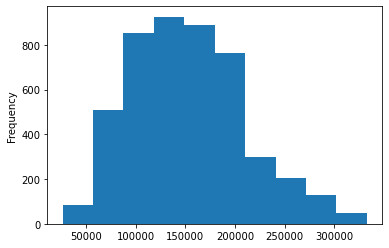

In [111]:
# test plot to make sure data is good
us_dev_df['Salary'].plot(kind='hist')
plt.show()

4.1.4 Exporting cleaned data to new CSV for analysis

In [ ]:
# CSV export
# us_dev_df.to_csv('us_dev_df.csv')